In [ ]:
#code credit- Utkarsh ranjan

In [ ]:
try:
    from google.colab import drive
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

if COLAB:
  !sudo apt-get install -y xvfb ffmpeg
  !pip install -q 'gym==0.10.11'
  !pip install -q 'imageio==2.4.0'
  !pip install -q PILLOW
  !pip install -q 'pyglet==1.3.2'
  !pip install -q pyvirtualdisplay
  !pip install -q --upgrade tensorflow-probability
  !pip install -q tf-agents

  # ROM dependencies for atari games
  ! wget http://www.atarimania.com/roms/Roms.rar
  ! mkdir /content/ROM/
  ! unrar e /content/Roms.rar /content/ROM/
  ! python -m atari_py.import_roms /content/ROM/

  # For visualisation on colab
  !pip install gym pyvirtualdisplay > /dev/null 2>&1
  !apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

  # gym installation
  !apt-get update > /dev/null 2>&1
  !apt-get install cmake > /dev/null 2>&1
  !pip install --upgrade setuptools 2>&1
  !pip install ez_setup > /dev/null 2>&1
  !pip install gym[atari] > /dev/null 2>&1

  # For use of GPU
  %tensorflow_version 2.x
  import tensorflow as tf
  device_name = tf.test.gpu_device_name()
  if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
    global CPU
    CPU = True
  print('Found GPU at: {}'.format(device_name))

  # Required to save models in HDF5 format
  !pip install pyyaml h5py

Note: using Google CoLab
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 784 kB of archives.
After this operation, 2,270 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.9 [784 kB]
Fetched 784 kB in 1s (1,287 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting

Found GPU at: /device:GPU:0


In [ ]:
import gym
from gym.wrappers import Monitor
import glob
import io
import base64
from IPython.display import HTML
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay
from google.colab import files,drive

display = Display(visible=0, size=(1400, 900))
display.start()

"""
Utility functions to enable video recording of gym environment 
and displaying it.
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  files.download(mp4list[0])
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    print(video)
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [ ]:
# env = wrap_env(gym.make("MountainCar-v0"))
# with tf.device('/device:GPU:0'):   

for i in range(3):
  env = wrap_env(gym.make("MsPacman-v0")) 
  observation = env.reset()
  while True:
        
        # env.render()
        #your agent goes here
        action = env.action_space.sample() 
        if(i==1): action = env.action_space.sample()

        observation, reward, done, info = env.step(action)    
            
        if done:
            env.close()
            show_video()
            break;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x027\x0emdat\x00\x00\x02\xae\x06\x05\xff\xff\xaa\xdcE\xe9\xbd\xe6\xd9H\xb7\x96,\xd8 \xd9#\xee\xefx264 - core 152 r2854 e9a5903 - H.264/MPEG-4 AVC codec - Copyleft 2003-2017 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=-2 threads=3 lookahead_threads=1 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bframes=3 b_pyramid=2 b_adapt=1 b_bias=0 direct=1 weightb=1 open_gop=0 weightp=2 keyint=250 keyint_min=25 scenecut=40 intra_refresh=0 rc_lookahead=40 rc=crf mbtree=1 crf=23.0 qcomp=0.60 qpmin=0 qpmax=69 qpstep=4 ip_ratio=1.40 aq=1:1.00\x00\x80\x00\x00\x16\xa1e\x88\x84\x00\xdf\xd5dO]\xcf \xe1\xcfN\xb2\xcd)\xdd\r\x01\xf8\xf5W\xd5\x82\x15|\x17u.|B\x85A\xc7\x0e\xfa\x0b\x9c\x9c\xbf\xfa\x05o\x8chm\

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x02F^mdat\x00\x00\x02\xae\x06\x05\xff\xff\xaa\xdcE\xe9\xbd\xe6\xd9H\xb7\x96,\xd8 \xd9#\xee\xefx264 - core 152 r2854 e9a5903 - H.264/MPEG-4 AVC codec - Copyleft 2003-2017 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=-2 threads=3 lookahead_threads=1 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bframes=3 b_pyramid=2 b_adapt=1 b_bias=0 direct=1 weightb=1 open_gop=0 weightp=2 keyint=250 keyint_min=25 scenecut=40 intra_refresh=0 rc_lookahead=40 rc=crf mbtree=1 crf=23.0 qcomp=0.60 qpmin=0 qpmax=69 qpstep=4 ip_ratio=1.40 aq=1:1.00\x00\x80\x00\x00\x16\xaee\x88\x84\x00\xdf\xd5dO]\xcf \xe1\xcfN\xb2\xcd)\xdd\r\x01\xf8\xf5W\xd5\x82\x15|\x17u.|B\x85A\xc7\x0e\xfa\x0b\x9c\x9c\xbf\xfa\x05o\x8chm\xd8

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x01\xfd\xf8mdat\x00\x00\x02\xae\x06\x05\xff\xff\xaa\xdcE\xe9\xbd\xe6\xd9H\xb7\x96,\xd8 \xd9#\xee\xefx264 - core 152 r2854 e9a5903 - H.264/MPEG-4 AVC codec - Copyleft 2003-2017 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=-2 threads=3 lookahead_threads=1 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bframes=3 b_pyramid=2 b_adapt=1 b_bias=0 direct=1 weightb=1 open_gop=0 weightp=2 keyint=250 keyint_min=25 scenecut=40 intra_refresh=0 rc_lookahead=40 rc=crf mbtree=1 crf=23.0 qcomp=0.60 qpmin=0 qpmax=69 qpstep=4 ip_ratio=1.40 aq=1:1.00\x00\x80\x00\x00\x16\xa8e\x88\x84\x00\x9f\xda\x04T^TU\xac\xff\xf5<" J-2h;\xe0\xb2 \x8d\x12\x05\x93\x9c\x9a\xebd*aN\xb0\x7f\x8a\x01\x17\xfd\xe4\xdd\xdd\xb9\xe

In [ ]:
import tensorflow as tf
import numpy as np
import gym
import scipy.misc
import os
import random
import time
import matplotlib.pyplot as plt
from collections import deque
from skimage import transform
from google.colab import files,drive
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.losses import MeanSquaredError 
from tensorflow.keras.metrics import MeanSquaredError
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity

In [ ]:
def scale_lumininance(img):
    return np.dot(img[...,:3],[0.299,0.587,0.114])

In [ ]:
def preprocess_observation(obs):
    """
    To reduce the computation load we preprocess the date obtained from the atari-game env by
    reducing the resolution and adjusting the color.
    
    DeepMind took the maximum pixel value over subsequent frames to reduce flickering
    caused by the limitations of the Atari platform and then scale it from its current 
    210×160×3 resolution to 84×84.
    
    To convert this, we will take the luminance channel (denoted as Y) from the image, which is the our RGB channel, and apply linear weights to 
    the channel to transform it according to the relative luminance.
    Y = 0.299R + 0.587G + 0.114B
    """
    
    obs_gray = scale_lumininance(obs)
    obs_trans = transform.resize(obs_gray,(84,84))
    return np.moveaxis(obs_trans, 1, 0)

(84, 84) 9


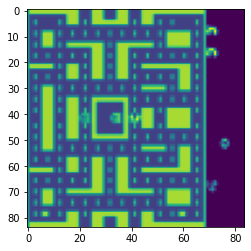

In [ ]:
env = wrap_env(gym.make('MsPacman-v0'))
observation = env.reset()
input_shape = preprocess_observation(observation).shape
plt.imshow(preprocess_observation(observation))
classes = env.action_space.n
env.close()
print(input_shape, classes)

In [ ]:
def Deepminds_model(input_shape, classes):
        
        
    X_input = Input(input_shape)
    
    X = Conv2D(32, (8, 8), strides = (4, 4), kernel_initializer = glorot_uniform(seed=0))(X_input)
    X = Activation('relu')(X)
    X = Conv2D(64, (4, 4), strides = (2, 2), kernel_initializer = glorot_uniform(seed=0))(X)
    X = Activation('relu')(X)
    X = Conv2D(64, (3, 3), strides = (1, 1), kernel_initializer = glorot_uniform(seed=0))(X)
    X = Activation('relu')(X)
    X = Flatten()(X)
    X = Dense(512, activation='relu', kernel_initializer = glorot_uniform(seed=0))(X)
    X = Dense(classes, activation='softmax', kernel_initializer = glorot_uniform(seed=0))(X)
    
    model = Model(inputs = X_input, outputs = X)

    return model

In [ ]:
def initialization(input_shape , classes, initial_collect_steps, buffer_size):
    """
    The target_network and prediction_network are initialized as ResNet50/DeepMind's CNN architecture with trainability
    of prediction_network set to False.
    
    The Experience Reply is initialized as a deque whose each element 
    is a tuple (current state, action, reward , done, next state)
    Few actions are executed with the environment to bootstrap the replay data.
    """
    global target_network,prediction_network,experience_replay
    target_network = Deepminds_model(input_shape,classes)  
    print(target_network.summary())
    prediction_network = Deepminds_model(input_shape,classes)
    print(prediction_network.summary())  
    experience_replay = deque(maxlen = buffer_size)
    
    observation = env.reset()
    for i in range(initial_collect_steps):
        current_state = preprocess_observation(observation)
        action = env.action_space.sample()
        observation, reward, done , _ = env.step(action)
        next_state = preprocess_observation(observation)

        if done:
          observation = env.reset()
        
        sample_observation = (current_state,action,reward,done,next_state)
        experience_replay.append(sample_observation)
    env.close()

In [ ]:
def plot(CR , episode, save_fig = True):
    plt.plot([i+1 for i in range(episode)],CR, linewidth=4, label = "DDQN")
    plt.xlabel("Episode")
    plt.ylabel("episode_reward")
    leg = plt.legend(loc='upper left', shadow=True)
    plt.grid()
    ax = plt.gca()
    plt.xlim([0, episode])
    
    output_dir = os.path.join(os.getcwd(), "output")
    if not os.path.exists(output_dir): os.mkdir(output_dir)
    
    if save_fig:
        plt.savefig(os.path.join(output_dir, "plot-{}th-episode.png".format(episode)), bbox_inches="tight")
        files.download(os.path.join(output_dir, "plot-{}th-episode.png".format(episode)))
    else:
        plt.show()
    plt.close()

In [ ]:
def eps_greedy_action(Q,eps):
    if np.random.random() < eps: # explore
        return np.random.randint(env.action_space.n)
    else: # exploit
        return np.random.choice(np.flatnonzero(Q == Q.numpy().max()))

In [ ]:
def experiment(N_episodes,gamma,learning_rate, c, batch_size,eps, log_interval):
    
  # Instantiate an optimizer to train the model.
  optimizer = tf.keras.optimizers.RMSprop(learning_rate) # used by deepminds
  # Instantiate a loss function.
  loss_fn = tf.keras.losses.MeanSquaredError()
  # Prepare the metrics.
  train_acc_metric = tf.keras.metrics.MeanSquaredError()
  
  CR = []
  with tf.device('/device:GPU:0'):

    for episode in range(N_episodes):
        start_time = time.time()
        time_step = 0
        env = wrap_env(gym.make('MsPacman-v0'))
        observation = env.reset()
        rewards = [] # compared to total points earned in the game
        while True:
            
            with tf.GradientTape() as tape:
                
             
                current_state = preprocess_observation(observation) 
                Q = prediction_network(np.array([current_state]), training=False)
                action = eps_greedy_action(Q,eps) 
                new_observation , reward , current_done , _ = env.step(action)
                rewards.append(reward)
                next_state = preprocess_observation(new_observation)
                
                sample_observation = (current_state, action, reward, current_done, next_state)
                experience_replay.append(sample_observation)
                
                minibatch = random.sample(list(experience_replay),batch_size)
                state_minibatch = np.array([current_state for (current_state, action, reward, done, next_state) in minibatch])
                actions = np.array([action for (current_state, action, reward, done, next_state) in minibatch])
                            
                target = []
                for (current_state, action, reward, done, next_state) in minibatch:
                    if done:
                        target.append(reward)
                    else:
                        Q_target = target_network(np.array([next_state]),training = False)
                        target.append(reward + gamma * Q_target.numpy().max())

                prediction_network_output = prediction_network(state_minibatch, training = True)
                prediction = [Q[action] for Q,action in zip(prediction_network_output,actions)]
                
                loss_value = loss_fn(target , prediction)
                grads = tape.gradient(loss_value, prediction_network.trainable_variables)
                optimizer.apply_gradients(zip(grads, prediction_network.trainable_variables))
                
                # Update training metric.
                train_acc_metric.update_state(target, prediction)

                # S -> S'
                observation = new_observation
                time_step+=1
                if time_step%100 == 0 :
                  print("Time_step:{}".format(time_step))
                
                if episode%c ==0: 
                    target_network.set_weights(prediction_network.get_weights()) 
              
                if current_done:
                
                    # Display metrics at the end of each episode.
                    train_acc = train_acc_metric.result()
                    print("Training acc over episode: %.4f" % (float(train_acc),))

                    # Reset training metrics at the end of each episode
                    train_acc_metric.reset_states()
                    
                    CR.append(np.squeeze(np.sum(np.array(rewards))))

                    env.close()
                    if (episode%log_interval==0):
                      show_video()
                      output_dir = os.path.join(os.getcwd(), "output")
                      if not os.path.exists(output_dir): os.mkdir(output_dir)
                      prediction_network.save(os.path.join(output_dir,"model-{}.h5".format(episode/log_interval)))
                      files.download(os.path.join(output_dir,"model-{}.h5".format(episode/log_interval)))
                      plot(CR,episode+1)
                    print("Episode {} finished after {} timesteps".format(episode+1, time_step+1))
                    print("{}s taken to finish this episode".format(time.time() - start_time))
                    break

In [ ]:
learning_rate = 2.5e-3

log_interval = 100

initial_collect_steps = 200
replay_buffer_max_length = 50000

gamma = 0.95
c = 10 # not sure
eps = 0.1
batch_size = 32
N_episodes = 12000
input_shape=(84,84,1)
initialization(input_shape,classes,initial_collect_steps,replay_buffer_max_length)
experiment(N_episodes, gamma, learning_rate, c, batch_size,eps,log_interval)


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 84, 84, 1)]       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 20, 20, 32)        2080      
_________________________________________________________________
activation_12 (Activation)   (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 9, 9, 64)          32832     
_________________________________________________________________
activation_13 (Activation)   (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
activation_14 (Activation)   (None, 7, 7, 64)          0   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x03\x1e\xeemdat\x00\x00\x02\xae\x06\x05\xff\xff\xaa\xdcE\xe9\xbd\xe6\xd9H\xb7\x96,\xd8 \xd9#\xee\xefx264 - core 152 r2854 e9a5903 - H.264/MPEG-4 AVC codec - Copyleft 2003-2017 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=-2 threads=3 lookahead_threads=1 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bframes=3 b_pyramid=2 b_adapt=1 b_bias=0 direct=1 weightb=1 open_gop=0 weightp=2 keyint=250 keyint_min=25 scenecut=40 intra_refresh=0 rc_lookahead=40 rc=crf mbtree=1 crf=23.0 qcomp=0.60 qpmin=0 qpmax=69 qpstep=4 ip_ratio=1.40 aq=1:1.00\x00\x80\x00\x00\x16\xb3e\x88\x84\x00\xdf\xd5dO]\xcf \xe1\xcfN\xb2\xcd)\xdd\r\x01\xf8\xf5W\xd5\x82\x15|\x17u.|B\x85A\xc7\x0e\xfa\x0b\x9c\x9c\xbf\xfa\x05o\x8c

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Episode 1 finished after 952 timesteps
168.7066593170166s taken to finish this episode
Time_step:100
Time_step:200
Time_step:300
Time_step:400
Time_step:500
Time_step:600
Time_step:700
Time_step:800
Training acc over episode: 18.6583
Episode 2 finished after 862 timesteps
142.2729389667511s taken to finish this episode
Time_step:100
Time_step:200
Time_step:300
Time_step:400
Time_step:500
Time_step:600
Time_step:700
Time_step:800
Time_step:900
Training acc over episode: 28.6269
Episode 3 finished after 948 timesteps
156.39674258232117s taken to finish this episode
Time_step:100
Time_step:200
Time_step:300
Time_step:400
Time_step:500
Time_step:600
Time_step:700
Time_step:800
Time_step:900
Time_step:1000
Training acc over episode: 32.6588
Episode 4 finished after 1007 timesteps
166.3521490097046s taken to finish this episode
Time_step:100
Time_step:200
Time_step:300
Time_step:400
Time_step:500
Time_step:600
Time_step:700
Time_step:800
Training acc over episode: 26.9756
Episode 5 finished 